<a href="https://colab.research.google.com/github/provincit/colab_public/blob/main/IRIS_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier


In [2]:

br = '\n'
iris = datasets.load_iris()
keys = iris.keys()
print (keys, br)
X = iris.data
y = iris.target
print ('features shape:', X.shape)
print ('target shape:', y.shape, br)
features = iris.feature_names
targets = iris.target_names
print ('feature set:')
print (features, br)
print ('targets:')
print (targets, br)
print (iris.DESCR[525:900], br)
rnd_clf = RandomForestClassifier(random_state=0,
n_estimators=100)
rnd_clf.fit(X, y)
rnd_name = rnd_clf.__class__.__name__
feature_importances = rnd_clf.feature_importances_
importance = sorted(zip(feature_importances, features),
reverse=True)
print ('most important features' + ' (' + rnd_name + '):')
[print (row) for i, row in enumerate(importance)]

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']) 

features shape: (150, 4)
target shape: (150,) 

feature set:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

targets:
['setosa' 'versicolor' 'virginica'] 


    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width: 

most important features (RandomForestClassifier):
(0.46044473961715215, 'petal length (cm)')
(0.42411626512710127, 'petal width (cm)')
(0.09090795402103087, 'sepal length (cm)')
(0.024531041234715757, 'sepal width (cm)')


[None, None, None, None]

PCA and LDA Iris dimensionality reduction

In [3]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import\
 LinearDiscriminantAnalysis
import seaborn as sns, matplotlib.pyplot as plt

       PCA1      PCA2
0 -2.684126  0.319397
1 -2.714142 -0.177001
2 -2.888991 -0.144949 



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


       LDA1      LDA2
0  8.061800  0.300421
1  7.128688 -0.786660
2  7.489828 -0.265384


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


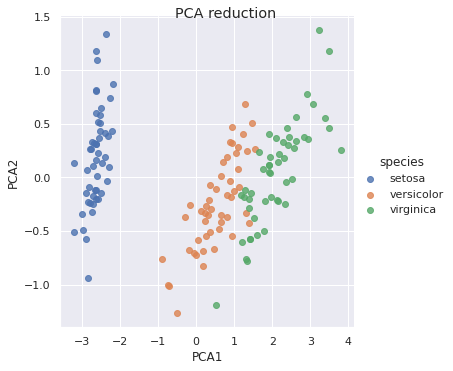

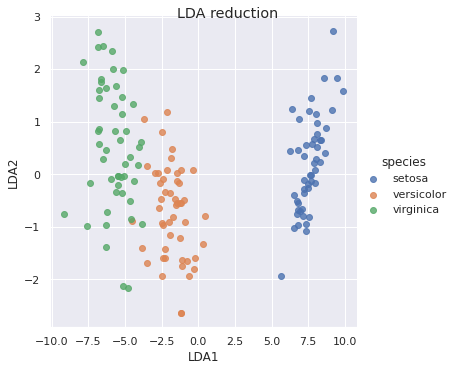

In [4]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
components = pca.n_components_
model = PCA(n_components=components)
model.fit(X)
X_2D = model.transform(X)
iris_df = sns.load_dataset('iris')
iris_df['PCA1'] = X_2D[:, 0]
iris_df['PCA2'] = X_2D[:, 1]
print (iris_df[['PCA1', 'PCA2']].head(3), br)
sns.set(color_codes=True)
sns.lmplot('PCA1', 'PCA2', hue='species',
data=iris_df, fit_reg=False)
plt.suptitle('PCA reduction')
lda = LinearDiscriminantAnalysis(n_components=2)
transform_lda = lda.fit_transform(X, y)
iris_df['LDA1'] = transform_lda[:,0]
iris_df['LDA2'] = transform_lda[:,1]
print (iris_df[['LDA1', 'LDA2']].head(3))
sns.lmplot('LDA1', 'LDA2', hue='species',
data=iris_df, fit_reg=False)
plt.suptitle('LDA reduction')
plt.show()